Import modułów

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

Załadowanie modelu ResNet50

In [2]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

model has 177 layers
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________

Załadowanie zbioru kwiatów i zmiana rozmiaru na 224x224, by pasować pod ResNet50

In [3]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'dandelion', 'daisy', 'roses', 'sunflowers', 'tulips'}


Edycja obrazków by pasowały pod ResNet50 i pokazanie przykładowego wyniku

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


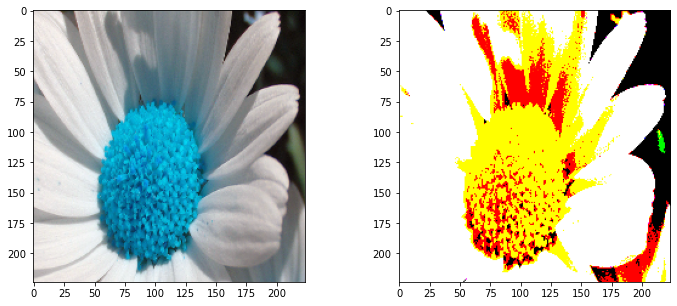

In [4]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

Klasyfikacja obrazków

In [5]:
predictions = model.predict(samples)

Wyniki klasyfikacji

In [6]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
    print(labels[i],'->',top3[i])

daisy -> [('n11939491', 'daisy', 0.95683193), ('n01914609', 'sea_anemone', 0.018991435), ('n04522168', 'vase', 0.0053728996)]
daisy -> [('n11939491', 'daisy', 0.9921457), ('n04522168', 'vase', 0.00187656), ('n03991062', 'pot', 0.0011353368)]
daisy -> [('n12985857', 'coral_fungus', 0.14186439), ('n01773797', 'garden_spider', 0.12148523), ('n11939491', 'daisy', 0.09142288)]
daisy -> [('n11939491', 'daisy', 0.24931307), ('n03485794', 'handkerchief', 0.16929755), ('n04026417', 'purse', 0.082159154)]
daisy -> [('n03617480', 'kimono', 0.5963812), ('n03814906', 'necklace', 0.10896057), ('n02667093', 'abaya', 0.030653916)]
daisy -> [('n11939491', 'daisy', 0.924303), ('n03944341', 'pinwheel', 0.068608455), ('n02865351', 'bolo_tie', 0.002504897)]
daisy -> [('n11939491', 'daisy', 0.9981528), ('n02219486', 'ant', 0.00026709403), ('n02206856', 'bee', 0.00022337196)]
daisy -> [('n11939491', 'daisy', 0.35287198), ('n03134739', 'croquet_ball', 0.09297404), ('n03787032', 'mortarboard', 0.053090677)]
da

dandelion -> [('n02526121', 'eel', 0.8980762), ('n04399382', 'teddy', 0.016651861), ('n01945685', 'slug', 0.016397325)]
dandelion -> [('n02319095', 'sea_urchin', 0.2723961), ('n02643566', 'lionfish', 0.09687466), ('n01910747', 'jellyfish', 0.076642536)]
dandelion -> [('n07730033', 'cardoon', 0.52982175), ('n04275548', 'spider_web', 0.10473133), ('n01518878', 'ostrich', 0.07675838)]
dandelion -> [('n07730033', 'cardoon', 0.42323777), ('n02280649', 'cabbage_butterfly', 0.07797811), ('n02281787', 'lycaenid', 0.053681526)]
dandelion -> [('n03729826', 'matchstick', 0.19756675), ('n03627232', 'knot', 0.15682708), ('n04033901', 'quill', 0.07209424)]
dandelion -> [('n01914609', 'sea_anemone', 0.24159864), ('n01917289', 'brain_coral', 0.20565996), ('n07734744', 'mushroom', 0.17852241)]
dandelion -> [('n02319095', 'sea_urchin', 0.41023555), ('n01914609', 'sea_anemone', 0.27975154), ('n02317335', 'starfish', 0.1332306)]
dandelion -> [('n04127249', 'safety_pin', 0.9197306), ('n03388043', 'fountain

roses -> [('n01950731', 'sea_slug', 0.10907495), ('n03958227', 'plastic_bag', 0.106012255), ('n02909870', 'bucket', 0.09410272)]
roses -> [('n01910747', 'jellyfish', 0.6032616), ('n03482405', 'hamper', 0.15409444), ('n04259630', 'sombrero', 0.042447038)]
roses -> [('n03991062', 'pot', 0.16892096), ('n03944341', 'pinwheel', 0.06923556), ('n03930313', 'picket_fence', 0.06592748)]
roses -> [('n04522168', 'vase', 0.4929164), ('n03916031', 'perfume', 0.21773903), ('n03690938', 'lotion', 0.115724176)]
roses -> [('n01770393', 'scorpion', 0.44523144), ('n07718747', 'artichoke', 0.17444578), ('n03916031', 'perfume', 0.041652247)]
roses -> [('n03476684', 'hair_slide', 0.25953254), ('n13052670', 'hen-of-the-woods', 0.153858), ('n13037406', 'gyromitra', 0.13342771)]
roses -> [('n01910747', 'jellyfish', 0.5961431), ('n03443371', 'goblet', 0.06468792), ('n03729826', 'matchstick', 0.041649)]
roses -> [('n03388043', 'fountain', 0.21685636), ('n03443371', 'goblet', 0.14428125), ('n04560804', 'water_jug

sunflowers -> [('n11939491', 'daisy', 0.94236666), ('n04049303', 'rain_barrel', 0.019491201), ('n01914609', 'sea_anemone', 0.0042584697)]
sunflowers -> [('n02319095', 'sea_urchin', 0.8366116), ('n11939491', 'daisy', 0.0845412), ('n01914609', 'sea_anemone', 0.025299648)]
sunflowers -> [('n01914609', 'sea_anemone', 0.7468301), ('n02319095', 'sea_urchin', 0.112192206), ('n02607072', 'anemone_fish', 0.033604454)]
sunflowers -> [('n03991062', 'pot', 0.6634712), ('n03457902', 'greenhouse', 0.11007361), ('n03930313', 'picket_fence', 0.036001455)]
sunflowers -> [('n02319095', 'sea_urchin', 0.8769893), ('n02655020', 'puffer', 0.046619676), ('n01914609', 'sea_anemone', 0.022105448)]
sunflowers -> [('n11939491', 'daisy', 0.6283756), ('n03944341', 'pinwheel', 0.23221181), ('n01914609', 'sea_anemone', 0.075335525)]
sunflowers -> [('n11939491', 'daisy', 0.93892723), ('n03944341', 'pinwheel', 0.017195199), ('n01914609', 'sea_anemone', 0.013017811)]
sunflowers -> [('n11939491', 'daisy', 0.1922432), ('

Przykładowe obrazki

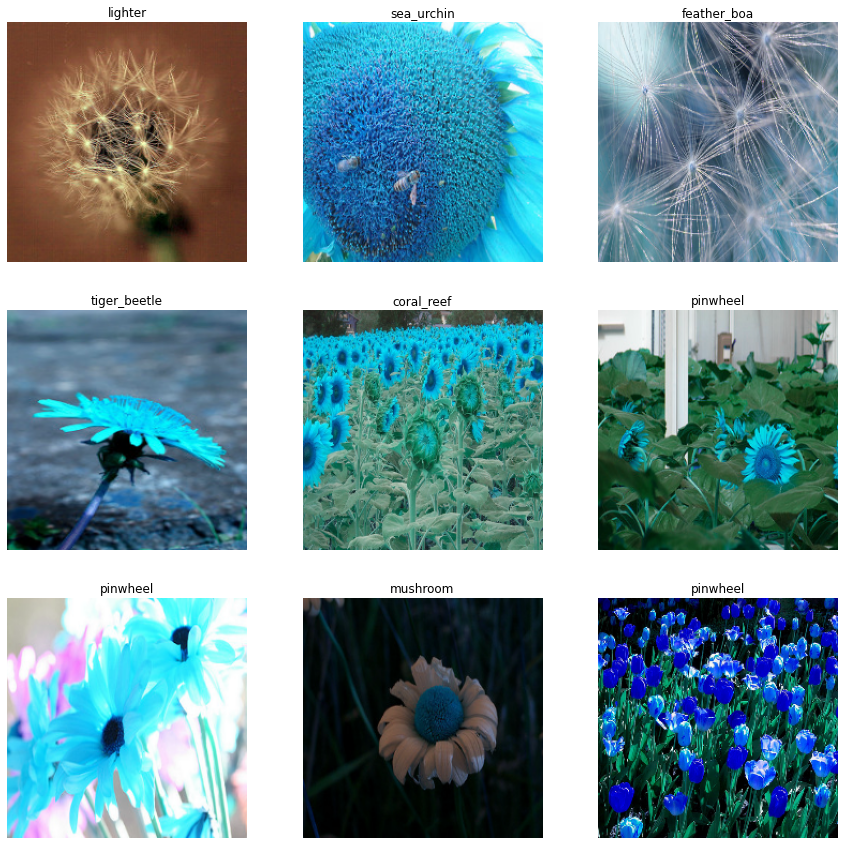

In [7]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

Załadowanie podstawowego modelu

In [8]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))
#base_model.summary()

Layers: 175


Porównanie modeli

In [9]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'tensorflow.python.keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'tensorflow.python.keras.layers.convolutional.ZeroPadding2D'>
   2 conv1_conv <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
   172 conv5_block3_3_bn <class 'tensorflow.python.keras.layers.normalization.BatchNormalization'>
   173 conv5_block3_add <class 'tensorflow.python.keras.layers.merge.Add'>
   174 conv5_block3_out <class 'tensorflow.python.keras.layers.core.Activation'>
   175 avg_pool <class 'tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D'>
   176 probs <class 'tensorflow.python.keras.layers.core.Dense'>

Base model: 175 layers
   0 input_2 <class 'tensorflow.python.keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'tensorflow.python.keras.layers.convolutional.ZeroPadding2D'>
   2 conv1_conv <class 'tensorflow.python.keras.la

Zbudowanie modelu używającego ResNet

In [10]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


Ustawienie trainable na false

In [11]:
for layer in model.layers[:175]:
    layer.trainable = False
    
for layer in model.layers[175:]:
    layer.trainable = True


Encoding labels

In [12]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


Trenowanie modelu

In [13]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.25,
                random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt]) 
print("Done")

(3670, 224, 224, 3)
Train on 2752 samples, validate on 918 samples
Epoch 1/5
2752/2752 [==============================] - 612s 222ms/sample - loss: 0.7673 - accuracy: 0.7144 - val_loss: 1.3833 - val_accuracy: 0.6765
Epoch 2/5
2752/2752 [==============================] - 631s 229ms/sample - loss: 0.5026 - accuracy: 0.8332 - val_loss: 0.9388 - val_accuracy: 0.8083
Epoch 3/5
2752/2752 [==============================] - 608s 221ms/sample - loss: 0.4223 - accuracy: 0.8656 - val_loss: 1.2147 - val_accuracy: 0.7342
Epoch 4/5
2752/2752 [==============================] - 568s 206ms/sample - loss: 0.3677 - accuracy: 0.8812 - val_loss: 0.5969 - val_accuracy: 0.8410
Epoch 5/5
2752/2752 [==============================] - 576s 209ms/sample - loss: 0.3359 - accuracy: 0.8819 - val_loss: 0.5111 - val_accuracy: 0.8486
Done


Osiągnięte wyniki

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

[[160   5   0  10   5]
 [ 11 198   0   4   1]
 [  5   7 100   9  46]
 [  4  11   1 148   6]
 [  2   2   4   6 173]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       180
           1       0.89      0.93      0.91       214
           2       0.95      0.60      0.74       167
           3       0.84      0.87      0.85       170
           4       0.75      0.93      0.83       187

    accuracy                           0.85       918
   macro avg       0.86      0.84      0.84       918
weighted avg       0.86      0.85      0.84       918

CNN Accuracy: 0.85
Cohen's Kappa: 0.81


Wykresy

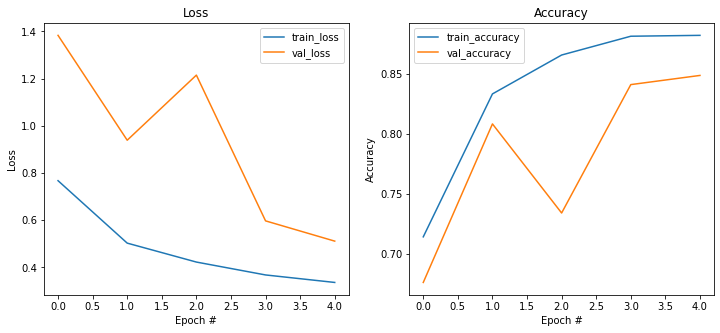

In [15]:
import matplotlib.pyplot as plt
N = np.arange(0, len(H.history["loss"]))

fig,(loss_plot,acc_plot) = plt.subplots(1,2, figsize=(12, 5))

loss_plot.plot(N, H.history["loss"], label="train_loss")
loss_plot.plot(N, H.history["val_loss"], label="val_loss")
loss_plot.set_title("Loss")
loss_plot.set(xlabel='Epoch #', ylabel='Loss')
loss_plot.legend()

acc_plot.plot(N, H.history["accuracy"], label="train_accuracy")
acc_plot.plot(N, H.history["val_accuracy"], label="val_accuracy")
acc_plot.set_title("Accuracy")
acc_plot.set(xlabel='Epoch #', ylabel='Accuracy')
acc_plot.legend()